# Regression 

___

By Warda Gull\
Computer Science Student\
University of South Asia, Pakistan.

___

It demonstrates how to use Linear Regression in  python.

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
df= sns.load_dataset('titanic')

In [5]:
df_linear= df[['age','fare']]

## Data Wrangling

In [6]:
# df_linear = df[df_linear[0]]
df_linear.isnull().sum() * 100 / len(df_linear)

age     19.86532
fare     0.00000
dtype: float64

In [7]:
df_linear.fillna(df_linear['age'].mean(), inplace=True)

C:\Users\Fcc\AppData\Local\Temp\ipykernel_12708\2674578430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_linear.fillna(df_linear['age'].mean(), inplace=True)


In [8]:
df_linear.isnull().sum() * 100 / len(df_linear)

age     0.0
fare    0.0
dtype: float64

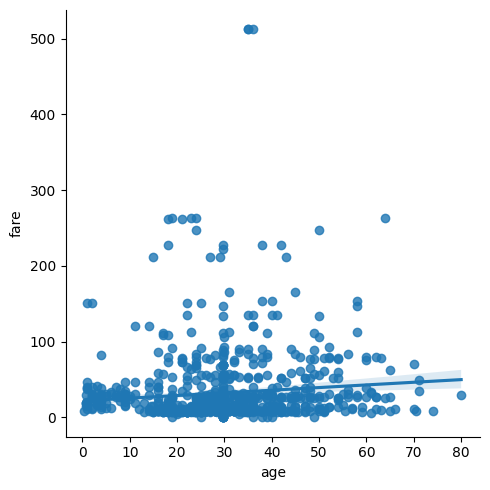

In [9]:
sns.lmplot(x='age', y='fare', data=df_linear)

<Axes: ylabel='age'>

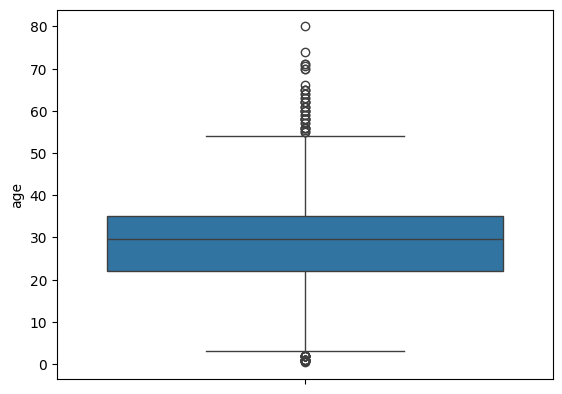

In [10]:
sns.boxplot(data= df_linear, y='age')

In [11]:
# removing outliers without using IQR

df_linear= df_linear[(df_linear['age']<45) & (df_linear['age']>10)]

<Axes: ylabel='age'>

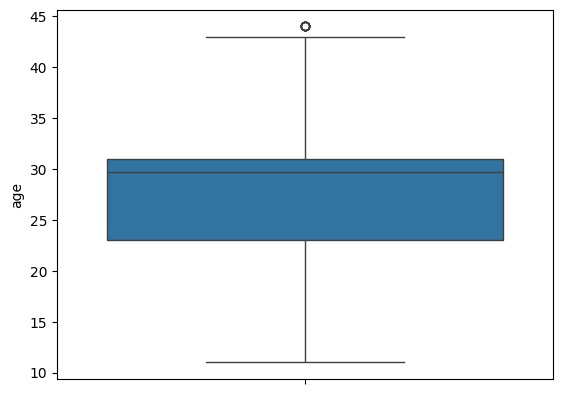

In [12]:
sns.boxplot(data= df_linear, y='age')

<Axes: ylabel='fare'>

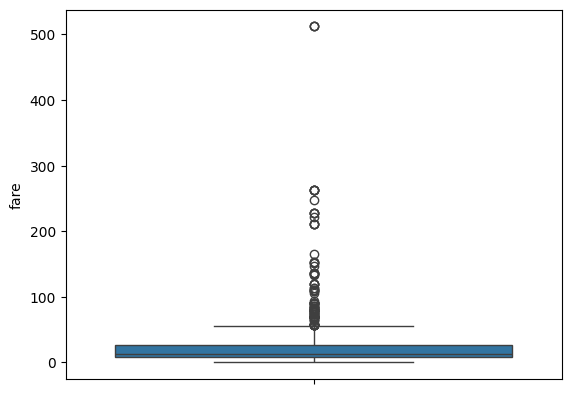

In [13]:
sns.boxplot(data= df_linear, y='fare')

In [14]:
df_linear= df_linear[(df_linear['fare']<40) & (df_linear['fare']>1)]

<Axes: ylabel='fare'>

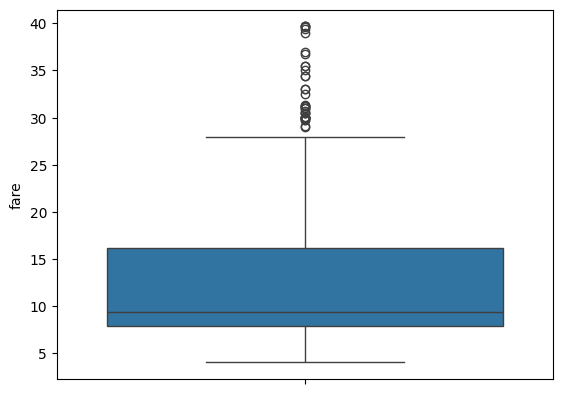

In [15]:
sns.boxplot(data= df_linear, y='fare')

## Simple Linear Model

In [16]:
x= df_linear[['age']]
y= df_linear['fare']

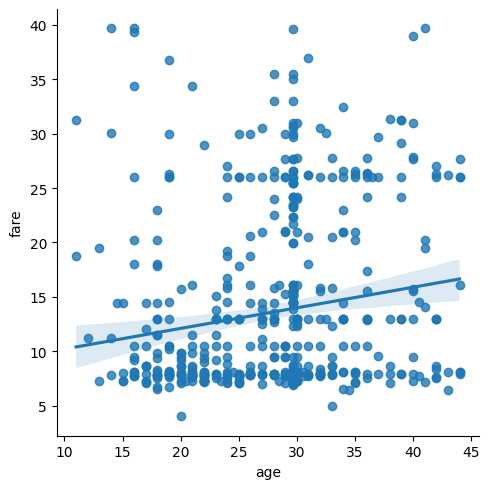

In [17]:
sns.lmplot(x='age', y='fare', data=df_linear)

# linear regression is not good for this data 

In [18]:
model= LinearRegression()

In [19]:
model.fit(x,y)

LinearRegression()

In [20]:
model.predict([[80]])

c:\Users\Fcc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([23.45982178])

**Evaluation Metrics for  Regression**

- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- R-squared (R2)
- Mean Absolute Percentage Error (MAPE

In [21]:
x_train, x_test, y_train, y_test= train_test_split(x,y, train_size=0.8)

In [22]:
model= LinearRegression()

In [23]:
model= model.fit(x_train, y_train)

In [24]:
predictions =model.predict(x_test)

<Axes: xlabel='fare'>

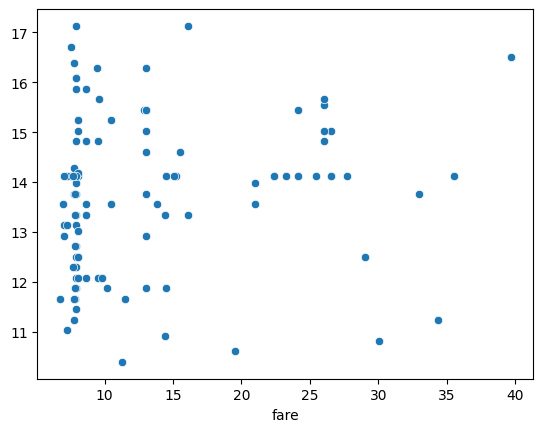

In [25]:
sns.scatterplot(x=y_test, y=predictions)

In [26]:
model.score(x_test, y_test)

-0.005143305453040092

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [28]:
MAE= mean_absolute_error(y_true=y_test, y_pred=predictions)
MSE= mean_squared_error(y_true=y_test, y_pred=predictions)
RMSE= mean_squared_error(y_true=y_test, y_pred=predictions, squared=False)
R2= r2_score(y_true=y_test, y_pred=predictions)

In [29]:
print(f'MAE: {MAE}')
print(f'MSE: {MSE}')
print(f'RMSE: {RMSE}')
print(f'R2: {R2}')

MAE: 6.350422191754903
MSE: 60.07601993656966
RMSE: 7.750872204892147
R2: -0.005143305453040092


**Mean Absolute Error (MAE):**

1. MAE tells you how much, on average, your predictions are off      from the actual values.
2. It looks at the absolute difference between each prediction and its actual value, adds them up, and then divides by the total number of predictions.
3. MAE is like taking the average of how far off your predictions are from the truth, without caring about the direction of the errors.

**Mean Squared Error (MSE):**

1. MSE also measures prediction errors but in a slightly different way.
2. Instead of just looking at the differences, it squares each error, adds them up, and then divides by the total number of predictions.
3. This squaring part makes large errors even more noticeable, as they contribute more to the final MSE value.

**Root Mean Squared Error (RMSE):** 

1. RMSE is just the square root of MSE.
2. It's like taking the "average" error but in the original units of your data, which makes it easier to understand.
3. RMSE helps you see how far, on average, your predictions are from the actual values, but in a way that matches your data's units.

**R-squared (Coefficient of Determination):**

1. R-squared tells you how well your model fits the data.
2. It gives you a number between 0 and 1, where 1 means your model perfectly predicts the data, and 0 means it's not predicting anything at all.
3. Higher R-squared values mean your model is doing a better job of explaining the variability in the data.

In [30]:
# Print the coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [0.210619]
Intercept: 7.863785634196087
